In [1]:
from google.colab import files
uploaded = files.upload()


Saving ott_churn_dataset.csv to ott_churn_dataset (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("ott_churn_dataset.csv")

df.head()


,user_id,age,gender,subscription_plan,monthly_watch_time_hours,total_sessions,preferred_genre,device_type,satisfaction_score,last_login_days_ago,support_tickets,churn
0,1,56,Female,Standard,62.3,35,Drama,Laptop,1.4,6,0,1
1,2,46,Male,Basic,53.2,13,Comedy,Mobile,2.4,14,2,0
2,3,32,Female,Standard,33.5,55,Sci-Fi,Tablet,1.1,20,3,1
3,4,25,Female,Standard,34.9,33,Romance,Mobile,1.3,18,2,1
4,5,38,Female,Standard,14.0,82,Documentary,Tablet,2.6,59,3,1


In [ ]:
df.info()


In [4]:
df.describe()


,user_id,age,monthly_watch_time_hours,total_sessions,satisfaction_score,last_login_days_ago,support_tickets,churn
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.665000,39.665500,45.475000,3.048000,28.345000,2.150000,0.585000
std,57.879185,12.604648,15.460491,24.167119,1.195845,16.805598,1.406196,0.493958
min,1.000000,18.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000
25%,50.750000,27.750000,30.675000,26.000000,1.900000,14.000000,1.000000,0.000000
50%,100.500000,40.000000,39.100000,44.000000,3.100000,27.000000,2.000000,1.000000
75%,150.250000,49.250000,51.250000,63.250000,4.000000,43.000000,3.000000,1.000000
max,200.000000,59.000000,81.800000,89.000000,5.000000,59.000000,4.000000,1.000000


In [5]:
df.isnull().sum()


,0
user_id,0
age,0
gender,0
subscription_plan,0
monthly_watch_time_hours,0
total_sessions,0
preferred_genre,0
device_type,0
satisfaction_score,0
last_login_days_ago,0


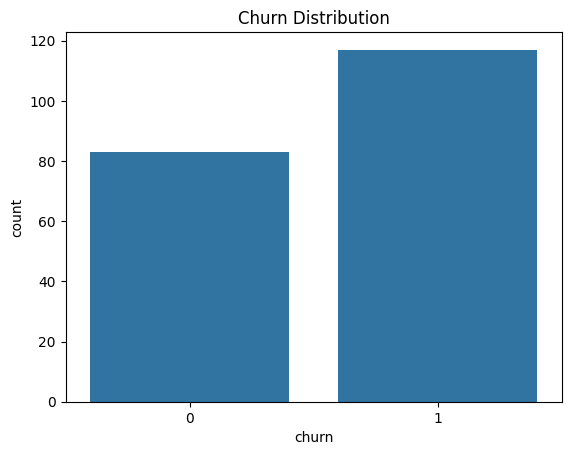

In [6]:
sns.countplot(data=df, x="churn")
plt.title("Churn Distribution")
plt.show()


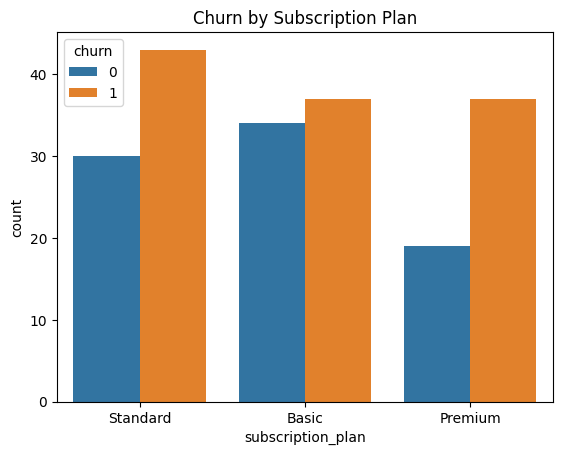

In [7]:
sns.countplot(data=df, x="subscription_plan", hue="churn")
plt.title("Churn by Subscription Plan")
plt.show()


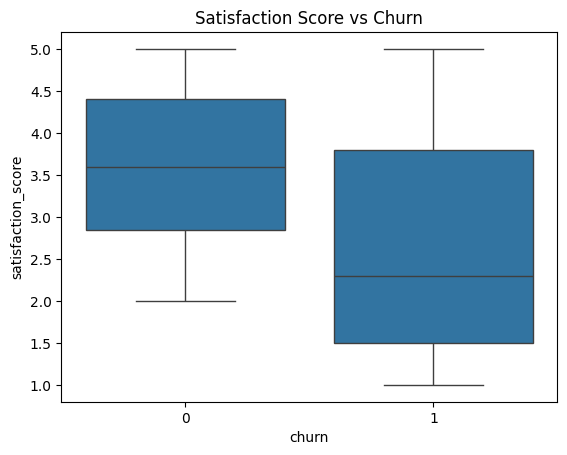

In [9]:
sns.boxplot(data=df, x="churn", y="satisfaction_score")
plt.title("Satisfaction Score vs Churn")
plt.show()


In [11]:
encoder = LabelEncoder()

for col in ["gender", "subscription_plan", "preferred_genre", "device_type"]:
    df[col] = encoder.fit_transform(df[col])


In [12]:
X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [14]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        23

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



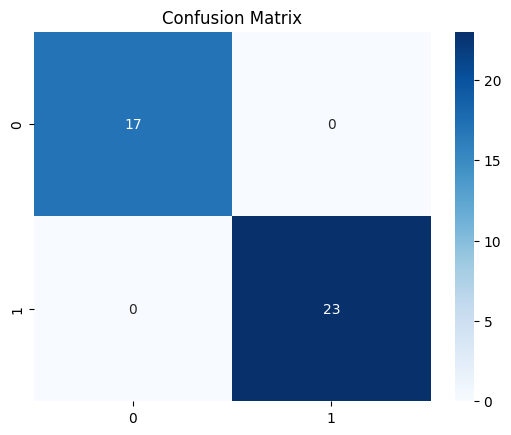

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


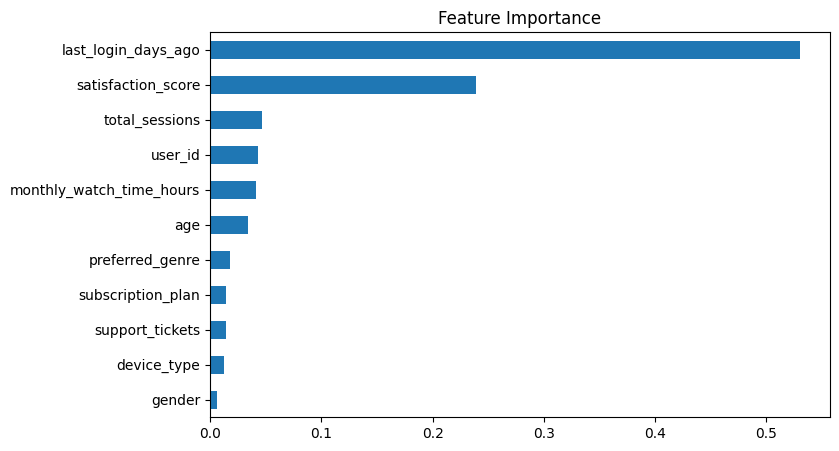

In [17]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance")
plt.show()


In [18]:
result = X_test.copy()
result["Actual"] = y_test
result["Predicted"] = y_pred

result.to_csv("churn_predictions_output.csv", index=False)

result.head()


,user_id,age,gender,subscription_plan,monthly_watch_time_hours,total_sessions,preferred_genre,device_type,satisfaction_score,last_login_days_ago,support_tickets,Actual,Predicted
95,96,59,1,0,50.3,59,1,1,2.6,3,3,0,0
15,16,39,0,0,51.9,5,0,3,4.7,10,2,0,0
30,31,32,1,1,33.3,45,3,1,3.1,5,4,0,0
158,159,18,1,1,26.7,28,5,2,4.5,17,1,0,0
128,129,59,0,0,13.4,52,3,0,3.1,21,4,0,0


In [19]:
from google.colab import files
files.download("churn_predictions_output.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>